<a href="https://colab.research.google.com/github/drameyjoshi/statistics/blob/master/training/Convergence_of_coin_tosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We conduct an experiment in which we toss a fair coin multiple times and estimate the probability of it landing head (let us call this outcome 'success') based on what we observe. If we toss the coin $500$ times then we will start estimating the probability as 
\begin{equation}\tag{1}
\hat{p}(N) = \frac{n}{N},
\end{equation}
where $n$ is the number of times the coin landed heads up in $N$ tosses. We expect that our estimate of probability, $\hat{p}$, gets closer to $0.5$ as $N$ increases. The reality is more complicated. Our estimates fluctuate around $0.5$ and we are unable to make up our mind to decide whether the coin was fair or not even after $10000$ tosses. We will illustrate this fact with a simple simulation using the random number generator in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

We toss a fair coin $500$ times and record the outcome in an array `tosses`.

In [2]:
n_trials = 500
prob_of_success = 0.5

np.random.seed(12111842)
tosses = scipy.stats.binom.rvs(n = 1, p = prob_of_success, size = n_trials)

As we keep tossing the coin, we also compute the probability of success based on our observations. It is just the number of ones seen until now divided by the number of tosses so far. We expect that our estimates of probability fluctuate a lot before settling down to $p = 0.5$. We can never be sure that the coin was fair until we observe a very large number of trials.

In [3]:
success_so_far = np.cumsum(tosses)
trials = np.linspace(start = 1, stop = n_trials, num = n_trials)
prob_estimate = success_so_far/trials

Text(0.5, 1.0, 'Estimate of probability of success')

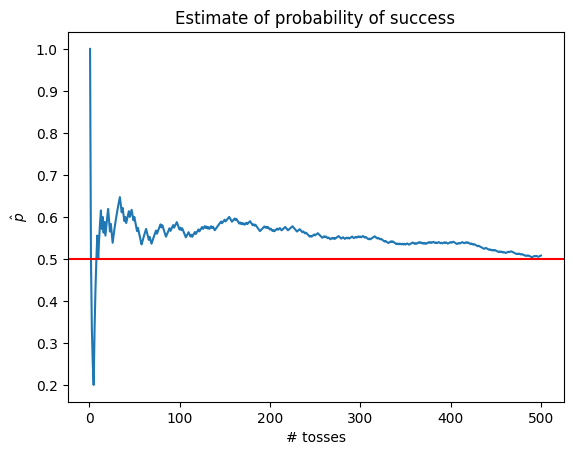

In [4]:
plt.plot(trials, prob_estimate)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('# tosses')
plt.ylabel(r'$\hat{p}$')
plt.title('Estimate of probability of success')

It is interesting to note that even after $400$ tosses we are wondering whether the coin is loaded. Let us now increase the number of trials to $5000$.

Text(0.5, 1.0, 'Estimate of probability of success')

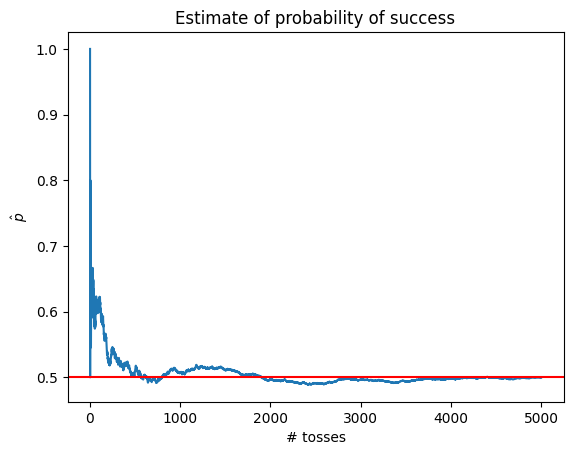

In [5]:
n_trials = 5000
tosses = scipy.stats.binom.rvs(n = 1, p = prob_of_success, size = n_trials)
success_so_far = np.cumsum(tosses)
trials = np.linspace(start = 1, stop = n_trials, num = n_trials)
prob_estimate = success_so_far/trials

plt.plot(trials, prob_estimate)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('# tosses')
plt.ylabel(r'$\hat{p}$')
plt.title('Estimate of probability of success')

Let us decide to take the estimates seriously only after we toss enough number of times, say only after $50$ tosses. We will redraw the plot from $50$ tosses
onward.

Text(0.5, 1.0, 'Estimate of probability of success')

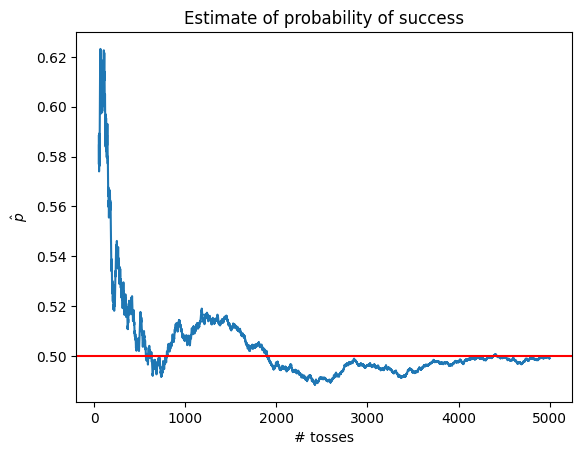

In [6]:
plt.plot(trials[50:], prob_estimate[50:])
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('# tosses')
plt.ylabel(r'$\hat{p}$')
plt.title('Estimate of probability of success')

In [7]:
first_crossing = np.where(prob_estimate < 0.5)
print("Estimate of probability first dropped below 0.5 after {} trials.".format(first_crossing[0][0]))

Estimate of probability first dropped below 0.5 after 568 trials.


Going by the results of the first $568$ tosses we would have concluded that coin is loaded in favour of success. For a few more tosses we would have derived the opposite conclusion but soon we would have reverted to the same suspicion. We are only seeing a manifestation of a random phenomenon. There is nothing unfair about the coin but by a stroke of chance, for close to $2000$ tosses we believe that the coin is loaded in favour of success. 

Does the estimate eventually settle down to $0.5$? Let us find out by increasin g the number of tosses to $10000$. This time, we plot our estimates only after tossing $500$ times.

Text(0.5, 1.0, 'Estimate of probability of success')

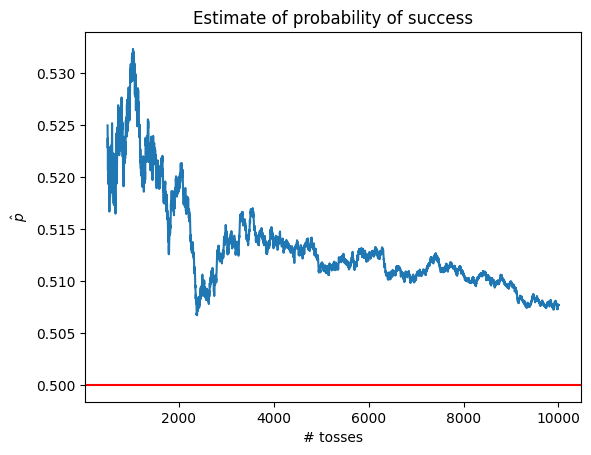

In [8]:
n_trials = 10000
tosses = scipy.stats.binom.rvs(n = 1, p = prob_of_success, size = n_trials)
success_so_far = np.cumsum(tosses)
trials = np.linspace(start = 1, stop = n_trials, num = n_trials)
prob_estimate = success_so_far/trials

plt.plot(trials[500:], prob_estimate[500:])
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('# tosses')
plt.ylabel(r'$\hat{p}$')
plt.title('Estimate of probability of success')

We surely cannot continue this way. In order to finally decide whether our experience a possible outcome of an experiment with a fair coin we conduct a statistical test.

In [9]:
result = scipy.stats.binomtest(k=success_so_far[n_trials - 1], n = n_trials, p = 0.5)
print("H0: True probability is 0.5.")
max_type1_error = 0.05

print("Results of the test with maximum type 1 error = {}:".format(max_type1_error))
if result.pvalue < max_type1_error:
    print("Reject the null hypothesis.")
else:
    print("Failed to reject the null hypothesis.")

H0: True probability is 0.5.
Results of the test with maximum type 1 error = 0.05:
Failed to reject the null hypothesis.


Even in a simple experiment like tossing a fair coin it is very hard to estimate the true probability of success by merely observing the tosses, however many they may be. The only reliable way to tell whether the coin was fair or not is to conduct a rigorous statistical test. In this case, the [binomial test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html). The test computes the probability that a sequence of heads and tails like this one is generated by a fair coin.

In a real world both the gambling house and its customers have finite resources. Let us assume that the player earns a pound from the gambling house each time the coin lands on its head. We will now compute the liability at the end of each toss and plot it.

Text(0.5, 1.0, 'Liability of the house')

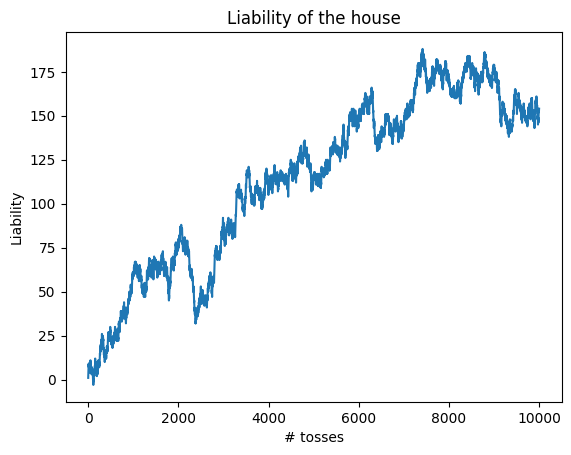

In [17]:
house_liability = [0] * len(tosses)
for i in range(len(tosses)):
    if tosses[i] == 1:
        house_liability[i] = 1
    else:
        house_liability[i] = -1


plt.plot(range(len(tosses)), np.cumsum(house_liability))
plt.xlabel("# tosses")
plt.ylabel("Liability")
plt.title("Liability of the house")

Most houses will be able to sustain a liability of 175 pounds. But if the cost of losing was raised to a thousand pounds then either the house (or the customer if the situation was the other way round) will go bankrupt.